# 1. Importing Neccessary Libraries for Web Scraping and Analysis

In [1]:
!pip install datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from matplotlib.pyplot import figure
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation

from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 10.0 MB/s eta 0:00:00


# 2. Web Scrapping Data

In [51]:
import praw
import pandas as pd

# Set up Reddit API credentials
client_id = 'Lx-Nkcw84e6U51att9skBA'
client_secret = 'pvYdg_T7QoqETHFCb3I4ETX6w2NzWg'
user_agent = 'romeo_24032002'

# Initialize the Reddit instance with PRAW
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

# Choosing subreddit and fetch posts
subreddit_name = 'Politics'
subreddit = reddit.subreddit(subreddit_name)

# Fetch the top 1000 posts
top_posts = subreddit.top(limit=10000)

# List to store post data
posts_data = []

# Loop through the posts and extract relevant data
for post in top_posts:
    posts_data.append({
        'Title': post.title,
        'Score': post.score,
        'ID': post.id,
        'URL': post.url,
        'Num Comments': post.num_comments,
        'Created At': post.created_utc,
        'Subreddit': post.subreddit.display_name,
        'Author': post.author.name if post.author else None,
    })

# Convert the data to a Pandas DataFrame
dataset = pd.DataFrame(posts_data)

# Save the data to a CSV file
dataset.to_csv('Data.csv', index=False)
print("Reddit data saved to 'Data.csv'.")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Reddit data saved to 'Data.csv'.


In [4]:
dataset

,Title,Score,ID,URL,Num Comments,Created At,Subreddit,Author
0,Megathread: Joe Biden Projected to Defeat Pres...,214316,jptq5n,https://www.reddit.com/r/politics/comments/jpt...,81377,1.604766e+09,politics,PoliticsModeratorBot
1,Mitch McConnell Will Lose Control Of The Senat...,156758,krntg6,https://www.buzzfeednews.com/article/paulmcleo...,10124,1.609940e+09,politics,klawdz
2,Megathread: House Votes to Impeach President D...,147739,ecm1zg,https://www.reddit.com/r/politics/comments/ecm...,50767,1.576719e+09,politics,PoliticsModeratorBot
3,Trump Threatens to ‘Leave the Country’ if He L...,135304,jcm5dz,https://www.thedailybeast.com/trump-threatens-...,16130,1.602897e+09,politics,ONE-OF-THREE
4,Demands for Kushner to Resign Over 'Staggering...,129737,i19sjg,https://www.commondreams.org/news/2020/07/31/d...,6767,1.596210e+09,politics,DaFunkJunkie
...,...,...,...,...,...,...,...,...
992,AOC jokes more people watched her gaming onlin...,63458,13rpepm,https://www.independent.co.uk/news/world/ameri...,1990,1.685039e+09,politics,Beckles28nz
993,Gov. Tim Walz doesn't own a single stock,62853,1emeatb,https://www.axios.com/2024/08/07/tim-walz-vp-p...,3961,1.723043e+09,politics,axios
994,John McCain famously shut down a racist voter ...,62695,cf9w57,https://www.businessinsider.com/john-mccain-ra...,4087,1.563555e+09,politics,BlankVerse
995,Megathread: Vice President Kamala Harris Annou...,61414,1elhbeb,https://www.reddit.com/r/politics/comments/1el...,15732,1.722950e+09,politics,PoliticsModeratorBot


In [5]:
df = pd.DataFrame(dataset['Title'])

In [6]:
# Create a new column 'Id' using the index values
df['Id'] = df.index

# Display the updated DataFrame
print(df)

                                                 Title   Id
0    Megathread: Joe Biden Projected to Defeat Pres...    0
1    Mitch McConnell Will Lose Control Of The Senat...    1
2    Megathread: House Votes to Impeach President D...    2
3    Trump Threatens to ‘Leave the Country’ if He L...    3
4    Demands for Kushner to Resign Over 'Staggering...    4
..                                                 ...  ...
992  AOC jokes more people watched her gaming onlin...  992
993           Gov. Tim Walz doesn't own a single stock  993
994  John McCain famously shut down a racist voter ...  994
995  Megathread: Vice President Kamala Harris Annou...  995
996  Jeff Bezos killed Washington Post endorsement ...  996

[997 rows x 2 columns]


In [7]:
df

,Title,Id
0,Megathread: Joe Biden Projected to Defeat Pres...,0
1,Mitch McConnell Will Lose Control Of The Senat...,1
2,Megathread: House Votes to Impeach President D...,2
3,Trump Threatens to ‘Leave the Country’ if He L...,3
4,Demands for Kushner to Resign Over 'Staggering...,4
...,...,...
992,AOC jokes more people watched her gaming onlin...,992
993,Gov. Tim Walz doesn't own a single stock,993
994,John McCain famously shut down a racist voter ...,994
995,Megathread: Vice President Kamala Harris Annou...,995


In [8]:
column_mapping = {
    'Title': 'text',

}

df.rename(columns=column_mapping, inplace=True)

In [9]:
df

,text,Id
0,Megathread: Joe Biden Projected to Defeat Pres...,0
1,Mitch McConnell Will Lose Control Of The Senat...,1
2,Megathread: House Votes to Impeach President D...,2
3,Trump Threatens to ‘Leave the Country’ if He L...,3
4,Demands for Kushner to Resign Over 'Staggering...,4
...,...,...
992,AOC jokes more people watched her gaming onlin...,992
993,Gov. Tim Walz doesn't own a single stock,993
994,John McCain famously shut down a racist voter ...,994
995,Megathread: Vice President Kamala Harris Annou...,995


In [10]:
# Rearrange columns
df = df[['Id', 'text']]

# Display the updated DataFrame
df

,Id,text
0,0,Megathread: Joe Biden Projected to Defeat Pres...
1,1,Mitch McConnell Will Lose Control Of The Senat...
2,2,Megathread: House Votes to Impeach President D...
3,3,Trump Threatens to ‘Leave the Country’ if He L...
4,4,Demands for Kushner to Resign Over 'Staggering...
...,...,...
992,992,AOC jokes more people watched her gaming onlin...
993,993,Gov. Tim Walz doesn't own a single stock
994,994,John McCain famously shut down a racist voter ...
995,995,Megathread: Vice President Kamala Harris Annou...


In [11]:
df.to_csv("Data.csv", index=False)

In [12]:
pd.set_option('display.max_colwidth', None)
df

,Id,text
0,0,Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election
1,1,Mitch McConnell Will Lose Control Of The Senate As Democrats Have Swept The Georgia Runoffs
2,2,Megathread: House Votes to Impeach President Donald J. Trump
3,3,Trump Threatens to ‘Leave the Country’ if He Loses to Biden
4,4,"Demands for Kushner to Resign Over 'Staggering' Level of 'Depravity' That Put Politics Before Public Health. ""Holy hell. Jared Kushner reportedly abandoned a national testing plan because it was *politically advantageous* to sit back and let blue states be eviscerated by the virus."""
...,...,...
992,992,AOC jokes more people watched her gaming online than listened to glitch-ridden DeSantis launch
993,993,Gov. Tim Walz doesn't own a single stock
994,994,"John McCain famously shut down a racist voter at a 2008 campaign event, now the video is going viral after Trump did nothing to stop racist chants at his rally"
995,995,Megathread: Vice President Kamala Harris Announces Minnesota Governor Tim Walz as Her 2024 Running Mate


In [13]:
import re

def clean_text(text):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    return ' '.join(text.lower().strip().split())

# Apply the cleaning function to the 'tweetContent' column
df['cleaned_RedditContent'] = df['text'].apply(clean_text)
# Create a new column for cleaned text to keep original data

# Display the updated DataFrame
df

<ipython-input-13-dd5a5b1f2937>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_RedditContent'] = df['text'].apply(clean_text)


,Id,text,cleaned_RedditContent
0,0,Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election,megathread joe biden projected to defeat president donald trump and win the 2020 us presidential election
1,1,Mitch McConnell Will Lose Control Of The Senate As Democrats Have Swept The Georgia Runoffs,mitch mcconnell will lose control of the senate as democrats have swept the georgia runoffs
2,2,Megathread: House Votes to Impeach President Donald J. Trump,megathread house votes to impeach president donald j trump
3,3,Trump Threatens to ‘Leave the Country’ if He Loses to Biden,trump threatens to leave the country if he loses to biden
4,4,"Demands for Kushner to Resign Over 'Staggering' Level of 'Depravity' That Put Politics Before Public Health. ""Holy hell. Jared Kushner reportedly abandoned a national testing plan because it was *politically advantageous* to sit back and let blue states be eviscerated by the virus.""",demands for kushner to resign over staggering level of depravity that put politics before public health holy hell jared kushner reportedly abandoned a national testing plan because it was politically advantageous to sit back and let blue states be eviscerated by the virus
...,...,...,...
992,992,AOC jokes more people watched her gaming online than listened to glitch-ridden DeSantis launch,aoc jokes more people watched her gaming online than listened to glitch ridden desantis launch
993,993,Gov. Tim Walz doesn't own a single stock,gov tim walz doesn t own a single stock
994,994,"John McCain famously shut down a racist voter at a 2008 campaign event, now the video is going viral after Trump did nothing to stop racist chants at his rally",john mccain famously shut down a racist voter at a 2008 campaign event now the video is going viral after trump did nothing to stop racist chants at his rally
995,995,Megathread: Vice President Kamala Harris Announces Minnesota Governor Tim Walz as Her 2024 Running Mate,megathread vice president kamala harris announces minnesota governor tim walz as her 2024 running mate


In [14]:
df.drop('text', axis=1, inplace=True)
df

,Id,cleaned_RedditContent
0,0,megathread joe biden projected to defeat president donald trump and win the 2020 us presidential election
1,1,mitch mcconnell will lose control of the senate as democrats have swept the georgia runoffs
2,2,megathread house votes to impeach president donald j trump
3,3,trump threatens to leave the country if he loses to biden
4,4,demands for kushner to resign over staggering level of depravity that put politics before public health holy hell jared kushner reportedly abandoned a national testing plan because it was politically advantageous to sit back and let blue states be eviscerated by the virus
...,...,...
992,992,aoc jokes more people watched her gaming online than listened to glitch ridden desantis launch
993,993,gov tim walz doesn t own a single stock
994,994,john mccain famously shut down a racist voter at a 2008 campaign event now the video is going viral after trump did nothing to stop racist chants at his rally
995,995,megathread vice president kamala harris announces minnesota governor tim walz as her 2024 running mate


In [15]:
nltk.download('punkt_tab')
nltk.download('stopwords')
# Define the function to remove stopwords with custom words
def remove_stopwords_with_custom_list(text, custom_stop_words=None):
    # Load NLTK's default stop words
    stop_words = set(stopwords.words('english'))

    # Add custom stop words if provided
    if custom_stop_words:
        stop_words.update(custom_stop_words)

    # Tokenize and filter the text
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Return the cleaned text
    return " ".join(filtered_words)

# Define your custom stopwords
custom_words = {'u','say','says','saying','said','want'}

# Apply the function to the DataFrame
df['cleaned_RedditContent'] = df['cleaned_RedditContent'].apply(
    lambda x: remove_stopwords_with_custom_list(x, custom_words)
)

# Display the DataFrame
print(df)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


      Id  \
0      0   
1      1   
2      2   
3      3   
4      4   
..   ...   
992  992   
993  993   
994  994   
995  995   
996  996   

                                                                                                                                                                                                   cleaned_RedditContent  
0                                                                                                                         megathread joe biden projected defeat president donald trump win 2020 us presidential election  
1                                                                                                                                                    mitch mcconnell lose control senate democrats swept georgia runoffs  
2                                                                                                                                                                megathread house votes impeach presid

# 3. Explaratory Data Analysis

In [16]:
df.shape

(997, 2)

In [17]:
# Understand the structure of your dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     997 non-null    int64 
 1   cleaned_RedditContent  997 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [18]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Id                       0
cleaned_RedditContent    0
dtype: int64


In [19]:
# Basic NLTK processing
df['cleaned_RedditContent'][900]

'leaked video gop congressman admits party wants chaos inability get stuff done'

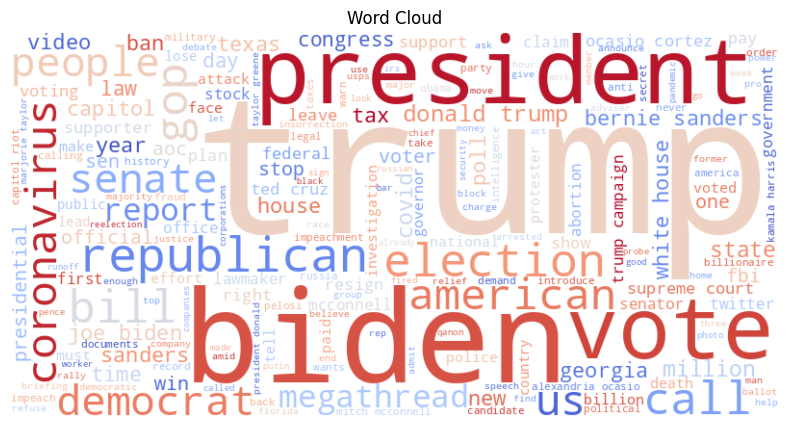

In [20]:
# Word Cloud with specified color palette
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(' '.join(df['cleaned_RedditContent']))
figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

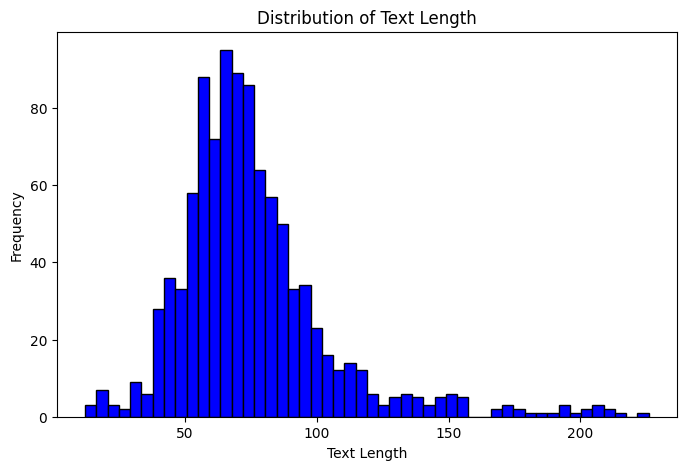

In [21]:
# Histogram of Text Length in Blue
plt.figure(figsize=(8, 5))
df['Text Length'] = df['cleaned_RedditContent'].apply(len)
plt.hist(df['Text Length'], bins=50, edgecolor='black', color='blue')  # Adjusting color to pink
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Sentimental Analysis

# 4. Basic NLTK Processing

In [22]:
# Basic NLTK processing
example = df['cleaned_RedditContent'][500]
print(example)

know still register vote georgia senate runoffs


In [23]:

tokens = nltk.word_tokenize(example)
tokens[:10]


['know', 'still', 'register', 'vote', 'georgia', 'senate', 'runoffs']

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('know', 'NNS'),
 ('still', 'RB'),
 ('register', 'VBP'),
 ('vote', 'NN'),
 ('georgia', 'NN'),
 ('senate', 'NN'),
 ('runoffs', 'NNS')]

# 5. VADER Sentiment Scoring

In [25]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [26]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [27]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_RedditContent']
    myid = i
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/997 [00:00<?, ?it/s]

In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,cleaned_RedditContent,Text Length
0,0,0.169,0.618,0.213,0.2023,megathread joe biden projected defeat president donald trump win 2020 us presidential election,94
1,1,0.252,0.748,0.000,-0.4019,mitch mcconnell lose control senate democrats swept georgia runoffs,67
2,2,0.000,1.000,0.000,0.0000,megathread house votes impeach president donald j trump,55
3,3,0.670,0.330,0.000,-0.6249,trump threatens leave country loses biden,41
4,4,0.274,0.658,0.068,-0.8176,demands kushner resign staggering level depravity put politics public health holy hell jared kushner reportedly abandoned national testing plan politically advantageous sit back let blue states eviscerated virus,211
...,...,...,...,...,...,...,...
992,992,0.000,0.833,0.167,0.2500,aoc jokes people watched gaming online listened glitch ridden desantis launch,77
993,993,0.000,1.000,0.000,0.0000,gov tim walz single stock,25
994,994,0.321,0.603,0.076,-0.7971,john mccain famously shut racist voter 2008 campaign event video going viral trump nothing stop racist chants rally,115
995,995,0.000,1.000,0.000,0.0000,megathread vice president kamala harris announces minnesota governor tim walz 2024 running mate,95


# 6. Sentimental Analysis using VADER

In [29]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def lemmatize_and_filter(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if len(word) >= 4]
    return " ".join(lemmatized_words)

df['cleaned_RedditContent'] = df['cleaned_RedditContent'].apply(lemmatize_and_filter)
df

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Id,cleaned_RedditContent,Text Length
0,0,megathread biden projected defeat president donald trump 2020 presidential election,94
1,1,mitch mcconnell lose control senate democrat swept georgia runoff,67
2,2,megathread house vote impeach president donald trump,55
3,3,trump threatens leave country loses biden,41
4,4,demand kushner resign staggering level depravity politics public health holy hell jared kushner reportedly abandoned national testing plan politically advantageous back blue state eviscerated virus,211
...,...,...,...
992,992,joke people watched gaming online listened glitch ridden desantis launch,77
993,993,walz single stock,25
994,994,john mccain famously shut racist voter 2008 campaign event video going viral trump nothing stop racist chant rally,115
995,995,megathread vice president kamala harris announces minnesota governor walz 2024 running mate,95


In [30]:
def get_sentiment(vaders):
    polarity = sia.polarity_scores(vaders)
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['cleaned_RedditContent'].apply(get_sentiment)
df

,Id,cleaned_RedditContent,Text Length,Sentiment
0,0,megathread biden projected defeat president donald trump 2020 presidential election,94,Negative
1,1,mitch mcconnell lose control senate democrat swept georgia runoff,67,Negative
2,2,megathread house vote impeach president donald trump,55,Neutral
3,3,trump threatens leave country loses biden,41,Negative
4,4,demand kushner resign staggering level depravity politics public health holy hell jared kushner reportedly abandoned national testing plan politically advantageous back blue state eviscerated virus,211,Negative
...,...,...,...,...
992,992,joke people watched gaming online listened glitch ridden desantis launch,77,Positive
993,993,walz single stock,25,Neutral
994,994,john mccain famously shut racist voter 2008 campaign event video going viral trump nothing stop racist chant rally,115,Negative
995,995,megathread vice president kamala harris announces minnesota governor walz 2024 running mate,95,Neutral


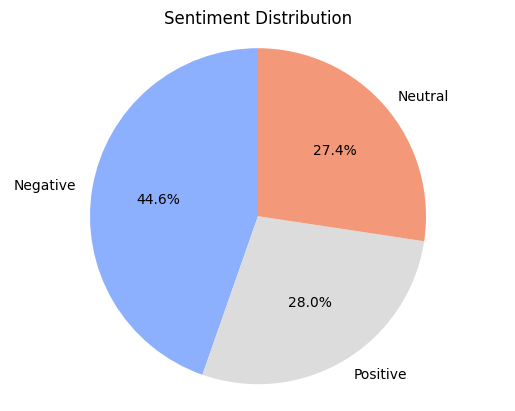

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a pie chart of the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts(normalize=True)

# Set the coolwarm color palette
colors = sns.color_palette('coolwarm', n_colors=len(sentiment_distribution))

# Create the pie chart with specified colors
fig, ax = plt.subplots()
ax.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

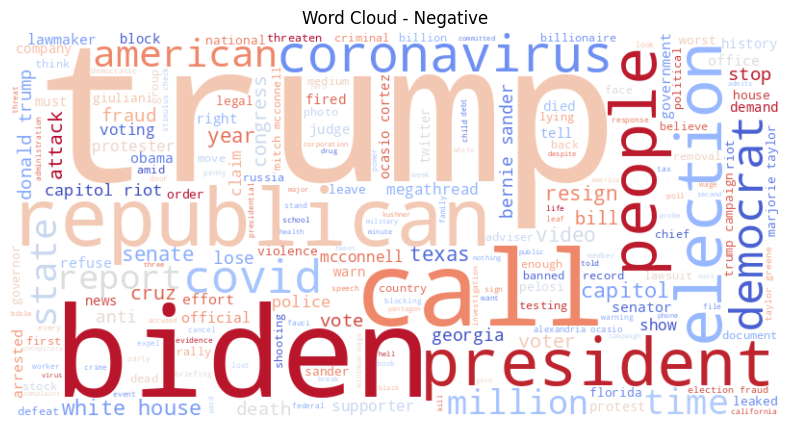

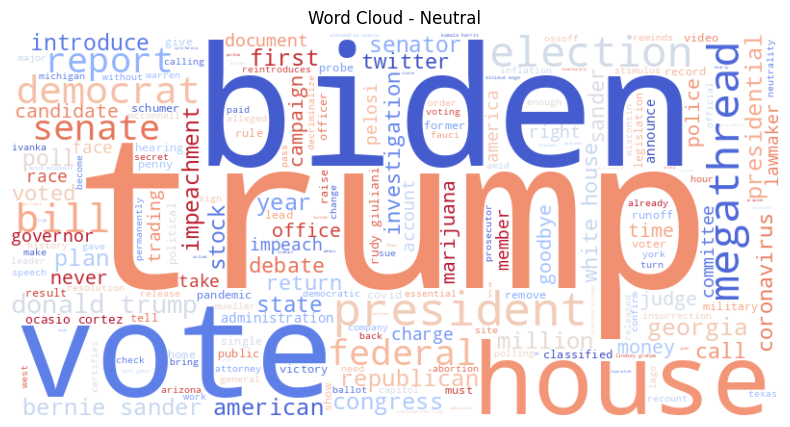

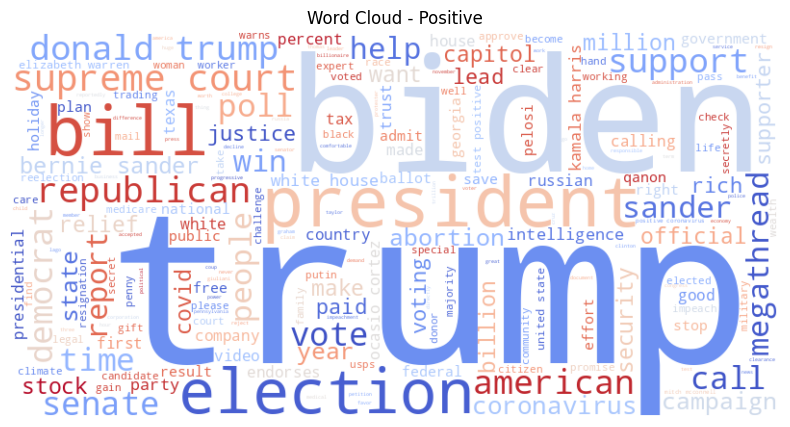

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' is your text column and 'Sentiment' is your sentiment column
for sentiment_class in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == sentiment_class]
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(' '.join(subset['cleaned_RedditContent']))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {sentiment_class}')
    plt.show()

In [33]:
pos_tweets_df = df[df['Sentiment'] == 'Positive'][['cleaned_RedditContent', 'Sentiment']]

# Display the first 5 rows of the new DataFrame
pos_tweets_df

,cleaned_RedditContent,Sentiment
8,donald trump left white house time good,Positive
9,virginia governor make election holiday expands early voting,Positive
14,elizabeth warren want member congress ever trading individual stock,Positive
21,covid stimulus package worth 9trillion clear senate kamala harris give breaking vote,Positive
22,texas supreme court reject republican effort throw nearly harris county vote,Positive
...,...,...
980,call adviser stephen miller resign email show promoted white nationalism,Positive
982,bill aim qanon follower security clearance,Positive
984,massachusetts republican governor support donald trump president,Positive
991,arnold schwarzenegger endorses kamala harris recognize country,Positive


In [34]:
neu_tweets_df = df[df['Sentiment'] == 'Neutral'][['cleaned_RedditContent', 'Sentiment']]

# Display the first 5 rows of the new DataFrame
neu_tweets_df

,cleaned_RedditContent,Sentiment
2,megathread house vote impeach president donald trump,Neutral
6,report biden admin discovers trump zero plan covid vaccine distribution,Neutral
11,house charge donald trump impeachment inciting insurrection,Neutral
16,biden taken lead historically state georgia,Neutral
19,news sued false election claim,Neutral
...,...,...
978,mexican president tell florida hispanic give single vote desantis,Neutral
988,senator dumped million stock reassuring public coronavirus preparedness,Neutral
989,trump admitted sabotaging usps screw election,Neutral
993,walz single stock,Neutral


In [35]:
neg_tweets_df = df[df['Sentiment'] == 'Negative'][['cleaned_RedditContent', 'Sentiment']]

# Display the first 5 rows of the new DataFrame
neg_tweets_df

,cleaned_RedditContent,Sentiment
0,megathread biden projected defeat president donald trump 2020 presidential election,Negative
1,mitch mcconnell lose control senate democrat swept georgia runoff,Negative
3,trump threatens leave country loses biden,Negative
4,demand kushner resign staggering level depravity politics public health holy hell jared kushner reportedly abandoned national testing plan politically advantageous back blue state eviscerated virus,Negative
5,million people sign petition calling declared terrorist group,Negative
...,...,...
986,jared kushner made deal russia ventilator covid crisis every single machine faulty report claim,Negative
987,committee member believe trump responsible riot panel might unanimously refer prosecution,Negative
990,megathread government accountability office find trump administration violated freezing ukraine,Negative
994,john mccain famously shut racist voter 2008 campaign event video going viral trump nothing stop racist chant rally,Negative


# Statistics Based Algorithm

In [36]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df['cleaned_RedditContent']
y = df['Sentiment']

# Split the dataset into training and testing sets (70% training, 30% testing)
# Set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (697,) (697,)
Testing set shape: (300,) (300,)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.astype(str))

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test.astype(str))

# Display the shape of the transformed data
print("TF-IDF Training set shape:", X_train_tfidf.shape)
print("TF-IDF Testing set shape:", X_test_tfidf.shape)

TF-IDF Training set shape: (697, 2430)
TF-IDF Testing set shape: (300, 2430)


## Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the TF-IDF transformed training data
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

    Negative       0.55      0.96      0.70       137
     Neutral       0.76      0.16      0.26        83
    Positive       0.67      0.35      0.46        80

    accuracy                           0.58       300
   macro avg       0.66      0.49      0.47       300
weighted avg       0.64      0.58      0.51       300


Confusion Matrix:
[[132   1   4]
 [ 60  13  10]
 [ 49   3  28]]


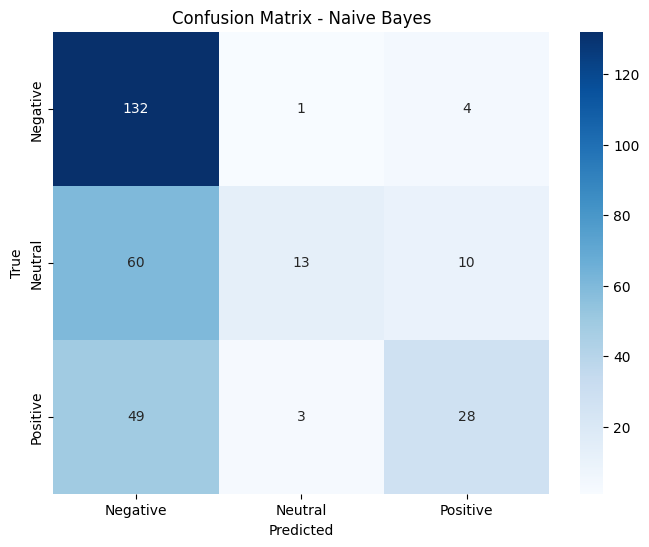

In [39]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert string labels to numerical format using LabelEncoder
y_test_numeric = le.fit_transform(y_test)

# Display confusion matrix heatmap for Naive Bayes
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

# Train the classifier on the TF-IDF transformed training data
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

    Negative       0.56      0.80      0.66       137
     Neutral       0.52      0.39      0.44        83
    Positive       0.60      0.34      0.43        80

    accuracy                           0.56       300
   macro avg       0.56      0.51      0.51       300
weighted avg       0.56      0.56      0.54       300


Confusion Matrix:
[[109  19   9]
 [ 42  32   9]
 [ 43  10  27]]


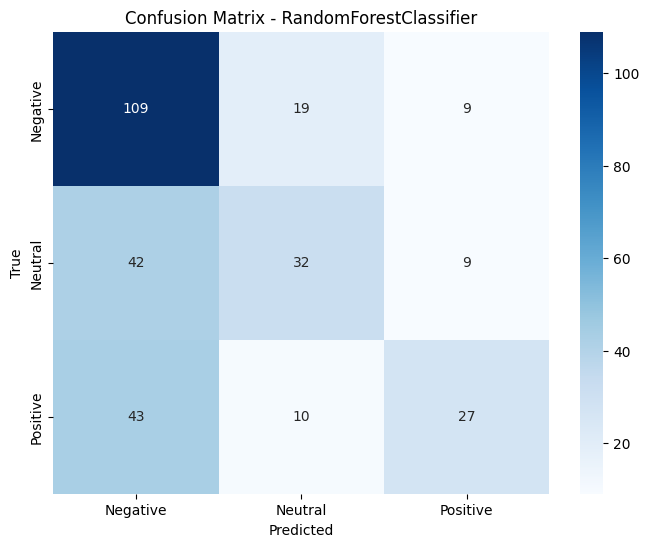

In [41]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert string labels to numerical format using LabelEncoder
y_test_numeric = le.fit_transform(y_test)

# Display confusion matrix heatmap for RandomForestClassifier
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SVM

In [42]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier on the TF-IDF transformed training data
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))



Accuracy: 0.54

Classification Report:
              precision    recall  f1-score   support

    Negative       0.52      0.99      0.68       137
     Neutral       0.86      0.14      0.25        83
    Positive       0.64      0.20      0.30        80

    accuracy                           0.54       300
   macro avg       0.67      0.44      0.41       300
weighted avg       0.64      0.54      0.46       300


Confusion Matrix:
[[135   1   1]
 [ 63  12   8]
 [ 63   1  16]]


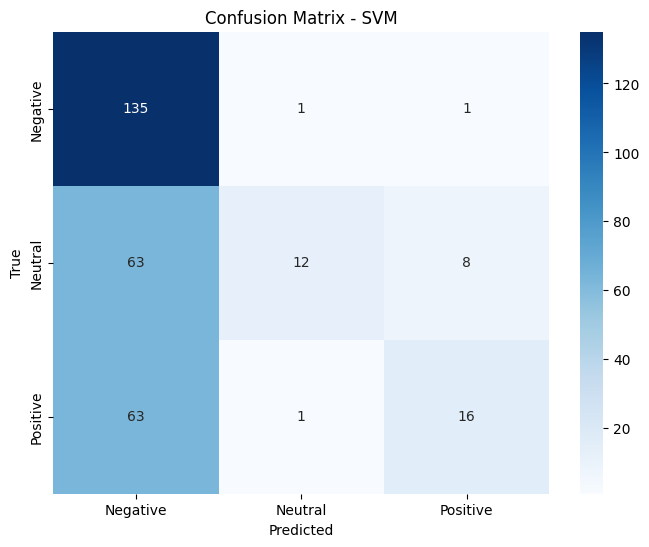

In [43]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert string labels to numerical format using LabelEncoder
y_test_numeric = le.fit_transform(y_test)

# Display confusion matrix heatmap for SVM
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# AdaBoost Classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# AdaBoostClassifier
ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train_tfidf, y_train)
y_pred_ada = ada_boost_classifier.predict(X_test_tfidf)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoostClassifier Accuracy: {accuracy_ada:.2f}")

# Display classification report and confusion matrix for AdaBoostClassifier
print("\nAdaBoostClassifier Classification Report:")
print(classification_report(y_test, y_pred_ada))

print("\nAdaBoostClassifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier Accuracy: 0.55

AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.76      0.62       137
     Neutral       0.51      0.35      0.41        83
    Positive       0.67      0.39      0.49        80

    accuracy                           0.55       300
   macro avg       0.57      0.50      0.51       300
weighted avg       0.56      0.55      0.53       300


AdaBoostClassifier Confusion Matrix:
[[104  20  13]
 [ 52  29   2]
 [ 41   8  31]]


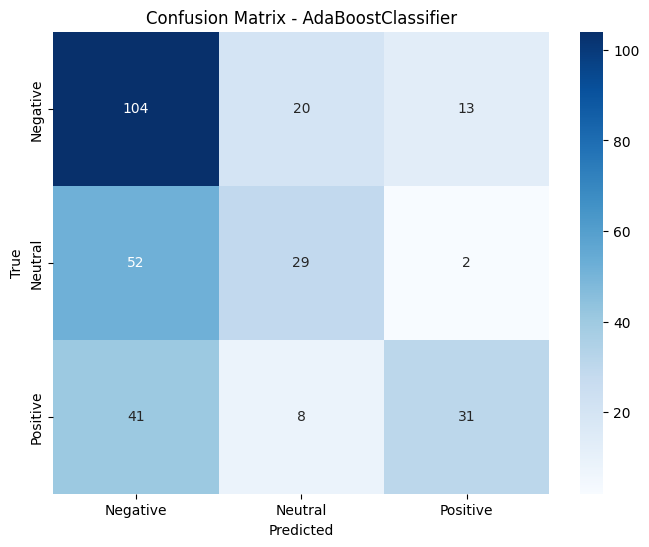

In [45]:
# Display confusion matrix heatmap for AdaBoostClassifier
plt.figure(figsize=(8, 6))
cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - AdaBoostClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# GradientBoostingClassifier

In [46]:
grad_boost_classifier = GradientBoostingClassifier()
grad_boost_classifier.fit(X_train_tfidf, y_train)
y_pred_grad = grad_boost_classifier.predict(X_test_tfidf)
accuracy_grad = accuracy_score(y_test, y_pred_grad)
print(f"GradientBoostingClassifier Accuracy: {accuracy_grad:.2f}")

# Display classification report and confusion matrix for GradientBoostingClassifier
print("\nGradientBoostingClassifier Classification Report:")
print(classification_report(y_test, y_pred_grad))

print("\nGradientBoostingClassifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_grad))

GradientBoostingClassifier Accuracy: 0.61

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.59      0.80      0.68       137
     Neutral       0.60      0.45      0.51        83
    Positive       0.69      0.46      0.55        80

    accuracy                           0.61       300
   macro avg       0.62      0.57      0.58       300
weighted avg       0.62      0.61      0.60       300


GradientBoostingClassifier Confusion Matrix:
[[109  16  12]
 [ 41  37   5]
 [ 34   9  37]]


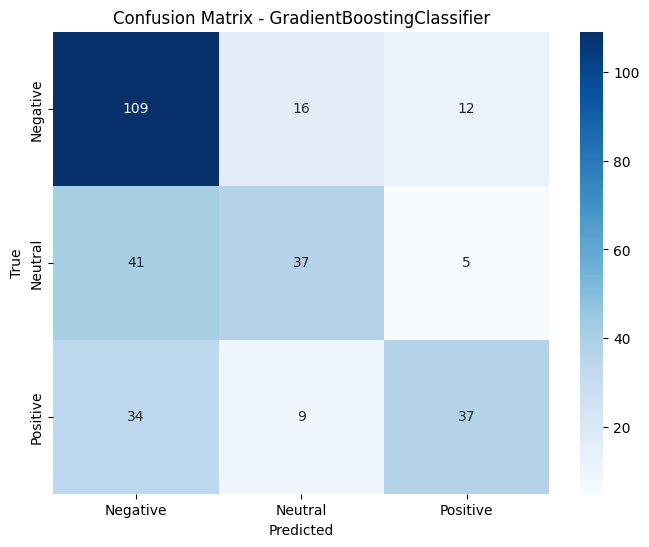

In [47]:
# Display confusion matrix heatmap for GradientBoostingClassifier
plt.figure(figsize=(8, 6))
cm_grad = confusion_matrix(y_test, y_pred_grad)
sns.heatmap(cm_grad, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - GradientBoostingClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# The Gradient Boosting Classifier model has the best accuracy among the models presented.

In [48]:
models = {
    'Naive Bayes': accuracy,
    'Random Forest': accuracy_rf,
    'SVM': accuracy_svm,
    'AdaBoost': accuracy_ada,
    'Gradient Boosting': accuracy_grad
}

best_model = max(models, key=models.get)
best_accuracy = models[best_model]

print(f"The best performing model in Statistic-Based Algorithm is {best_model} with an accuracy of {best_accuracy:.2f}")

The best performing model in Statistic-Based Algorithm is Gradient Boosting with an accuracy of 0.61


# Hybrid-Based (VADER + Random Forest)

Hybrid Model (VADER + Random Forest) Accuracy: 0.98

Hybrid Model Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.99      1.00       137
     Neutral       0.95      0.98      0.96        83
    Positive       0.96      0.95      0.96        80

    accuracy                           0.98       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300


Hybrid Model Confusion Matrix:
[[136   0   1]
 [  0  81   2]
 [  0   4  76]]


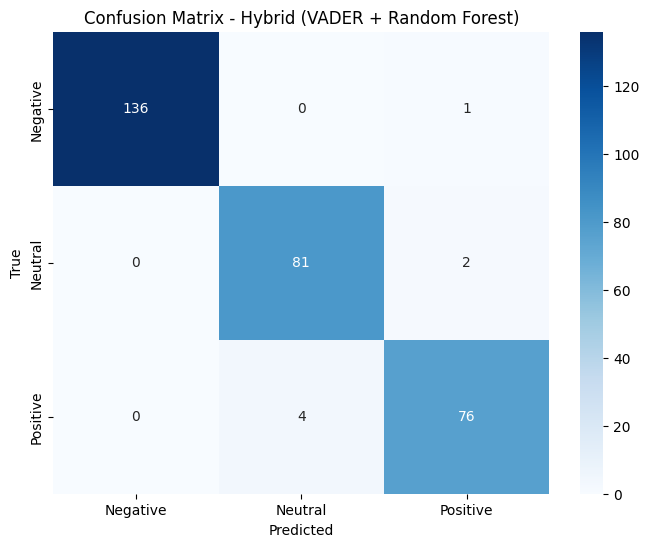

In [49]:
# Combine VADER and Random Forest

# 1. VADER Sentiment Scores
sia = SentimentIntensityAnalyzer()
vader_scores_train = []
for text in X_train:
    vader_scores_train.append(sia.polarity_scores(text)['compound'])

vader_scores_test = []
for text in X_test:
    vader_scores_test.append(sia.polarity_scores(text)['compound'])

# 2. Combine VADER scores with TF-IDF features
X_train_combined = np.column_stack((X_train_tfidf.toarray(), vader_scores_train))
X_test_combined = np.column_stack((X_test_tfidf.toarray(), vader_scores_test))

# 3. Train a Random Forest classifier on the combined features
rf_combined = RandomForestClassifier(random_state=42)
rf_combined.fit(X_train_combined, y_train)

# 4. Make predictions on the combined test data
y_pred_combined = rf_combined.predict(X_test_combined)

# 5. Evaluate the hybrid model
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print(f"Hybrid Model (VADER + Random Forest) Accuracy: {accuracy_combined:.2f}")

print("\nHybrid Model Classification Report:")
print(classification_report(y_test, y_pred_combined))

print("\nHybrid Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_combined))

# Display confusion matrix heatmap for the Hybrid model
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)

plt.figure(figsize=(8, 6))
cm_hybrid = confusion_matrix(y_test, y_pred_combined)
sns.heatmap(cm_hybrid, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Hybrid (VADER + Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
import pandas as pd

test=pd.read_csv("Data.csv")
test

,Id,text
0,0,Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election
1,1,Mitch McConnell Will Lose Control Of The Senate As Democrats Have Swept The Georgia Runoffs
2,2,Megathread: House Votes to Impeach President Donald J. Trump
3,3,Trump Threatens to ‘Leave the Country’ if He Loses to Biden
4,4,"Demands for Kushner to Resign Over 'Staggering' Level of 'Depravity' That Put Politics Before Public Health. ""Holy hell. Jared Kushner reportedly abandoned a national testing plan because it was *politically advantageous* to sit back and let blue states be eviscerated by the virus."""
...,...,...
992,992,AOC jokes more people watched her gaming online than listened to glitch-ridden DeSantis launch
993,993,Gov. Tim Walz doesn't own a single stock
994,994,"John McCain famously shut down a racist voter at a 2008 campaign event, now the video is going viral after Trump did nothing to stop racist chants at his rally"
995,995,Megathread: Vice President Kamala Harris Announces Minnesota Governor Tim Walz as Her 2024 Running Mate
